In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# GMM
from sklearn.mixture import GaussianMixture

In [87]:
df_traits = pd.read_csv('C:\\Users\\pablo\\OneDrive\\Desktop\\tree_clustering\\data\\traits_pred_log.csv')
trait_cols = df_traits.columns[1:]
# get a sample of 200 species
df_traits = df_traits.sample(2000)

# read taxonomic_information.csv
taxa = pd.read_csv('C:\\Users\\pablo\\OneDrive\\Desktop\\tree_clustering\\data\\taxonomic_information.csv')

In [90]:
# merge
df = pd.merge(df_traits, taxa, on='accepted_bin')

# check how many unique orders
total_orders = df['order'].nunique()

43

In [100]:
taxa['group'].nunique()

2

In [96]:
taxa.columns

Index(['genus', 'family', 'order', 'group', 'accepted_bin', 'mono_fern'], dtype='object')

In [91]:
# fit GMM with 20 components
k = total_orders
gmm = GaussianMixture(n_components=k, random_state=0)
gmm.fit(df[trait_cols])

GaussianMixture(n_components=43, random_state=0)

In [92]:
# sort df by order
df = df.sort_values('order')

# predict probabilities
probs = gmm.predict_proba(df[trait_cols])

prob_columns = ['prob_' + str(i) for i in range(k)]

df[prob_columns] = probs


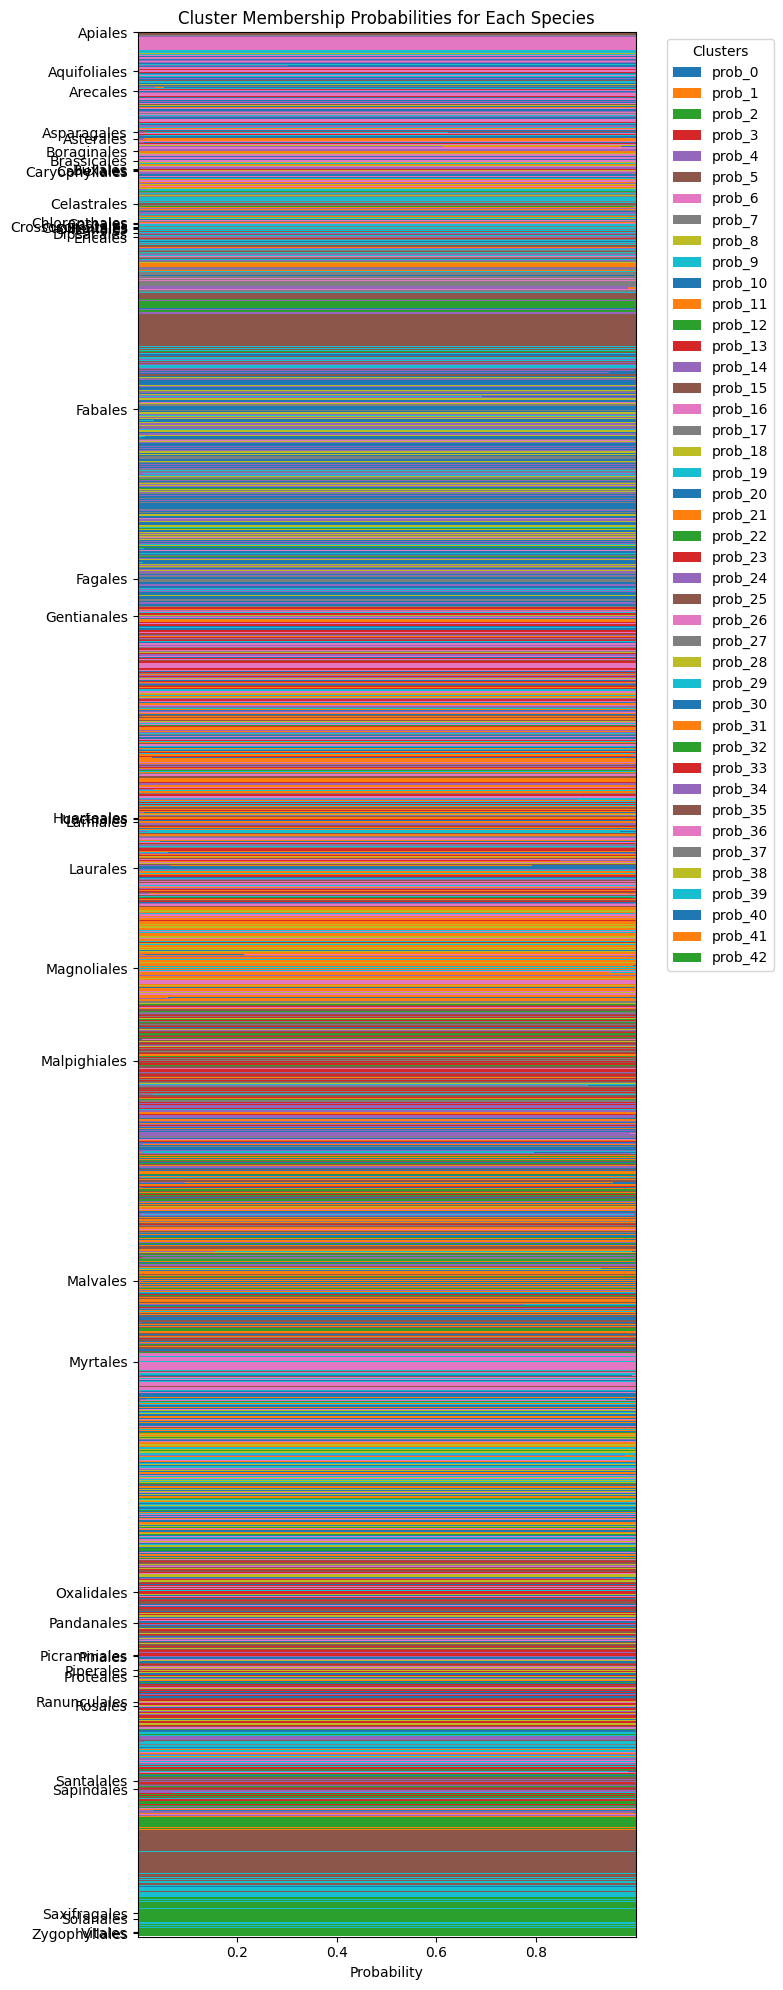

In [93]:
# set figure size
# plt.figure(figsize=(4, 30))

df[prob_columns].plot(kind='barh', stacked=True, width=1,
                      figsize=(8,20))  # Set the width close to 1 to reduce gaps

plt.xlabel('Probability')  # Only x-label is set
plt.title('Cluster Membership Probabilities for Each Species')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

# # To remove the y-axis label, use this:
# plt.gca().set_ylabel('')  # Removes the y-axis label
# plt.gca().set_yticklabels('')  # Set the y-tick labels to the species names
# plt.gca().yaxis.set_ticks_position('none')  # Remove the y-ticks


#################
# Find positions where new group starts
index_list = [i for i in range(len(df))]
# reset index for df
df = df.reset_index(drop=True)
unique_groups = df['order'].unique()
# sort
unique_groups = np.sort(unique_groups)
tick_positions = [len(df) - df.index[df['order'] == group][0] for group in unique_groups]  # Indexes of first occurrence of each group

# Set custom y-ticks
plt.gca().set_yticks(tick_positions)
plt.gca().set_yticklabels(unique_groups)  # Set group names as y-tick labels

# Remove all y-ticks except for the labeled ones
all_ticks = set(plt.gca().get_yticks())
labeled_ticks = set(tick_positions)
for unlabeled in all_ticks - labeled_ticks:
    plt.gca().get_yticklabels()[list(all_ticks).index(unlabeled)].set_visible(False)

# Remove y-axis label (if you don't want any label at all)
plt.gca().set_ylabel('')
######################

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything properly
# save fig
plt.savefig('C:\\Users\\pablo\\OneDrive\\Desktop\\tree_clustering\\membership_plot.png')
plt.show()